<a href="https://colab.research.google.com/github/rafaelrubo/python-geociencias/blob/main/python_geociencias02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python Aplicado às Geociências
##Parte 03
#####Rafael Rubo
#####rafaelrubo@gmail.com

In [1]:
import pandas as pd

df = pd.read_csv('dados.csv')

print(df.head())

   Profundidade_m  Densidade_gcm3  Umidade_% Tipo_Solo
0               0            1.25       15.4   arenoso
1               1            1.30       16.1   arenoso
2               2            1.35       18.2   arenoso
3               3            1.40       19.5   arenoso
4               4            1.45       21.0  argiloso


In [2]:
print(df.columns)  # Exibe os nomes das colunas

Index(['Profundidade_m', 'Densidade_gcm3', 'Umidade_%', 'Tipo_Solo'], dtype='object')


In [3]:
print(df.describe())  # Resumo estatístico dos dados

       Profundidade_m  Densidade_gcm3  Umidade_%
count        20.00000       20.000000  20.000000
mean          9.50000        1.426500  18.665000
std           5.91608        0.114261   3.814691
min           0.00000        1.250000  12.500000
25%           4.75000        1.330000  15.350000
50%           9.50000        1.435000  18.850000
75%          14.25000        1.525000  22.275000
max          19.00000        1.600000  24.000000


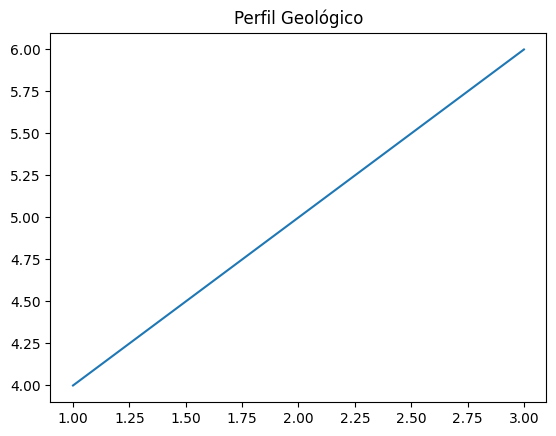

In [4]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [4, 5, 6])

plt.title("Perfil Geológico")

plt.show()

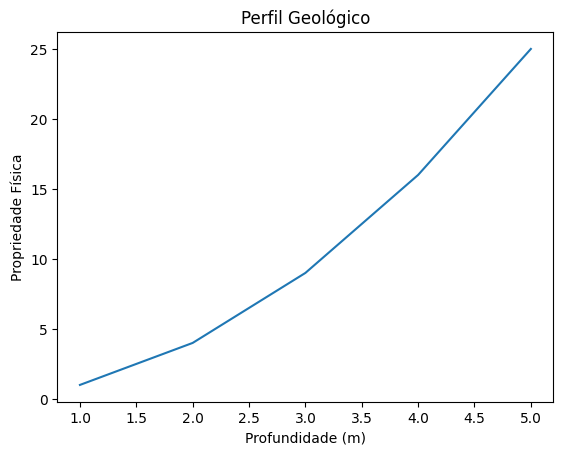

In [5]:
plt.plot([1, 2, 3, 4, 5], [1, 4, 9, 16, 25])

plt.title("Perfil Geológico")

plt.xlabel("Profundidade (m)")

plt.ylabel("Propriedade Física")

plt.show()

In [6]:
import numpy as np

#cria um array contendo 5 valores uniformemente distribuídos entre 0 e 10
x = np.linspace(0, 10, 5)

print(x)

[ 0.   2.5  5.   7.5 10. ]


In [7]:
y = np.linspace(-5, 5, 100)  # 100 valores de -5 a 5

print(y)

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

In [8]:
import numpy as np

x = np.linspace(-5, 5, 50)

y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(x, y)

Z = np.sin(np.sqrt(X**2 + Y**2))

print(f"Dimensão de X: {X.shape}, Dimensão de Z: {Z.shape}")

Dimensão de X: (50, 50), Dimensão de Z: (50, 50)


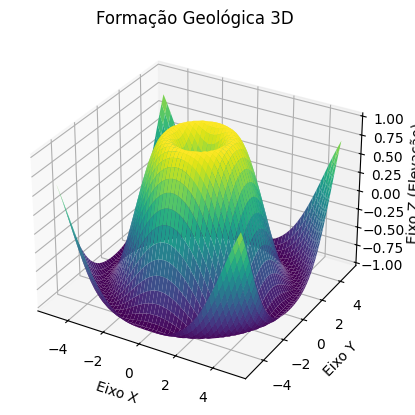

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Criando o gráfico 3D ​
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Personalizando o gráfico ​
ax.set_title("Formação Geológica 3D")
ax.set_xlabel("Eixo X")
ax.set_ylabel("Eixo Y")
ax.set_zlabel("Eixo Z (Elevação)")

plt.show()

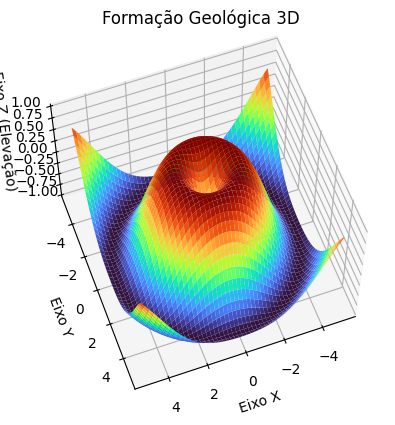

In [10]:
# Criando o gráfico 3D ​
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='turbo', edgecolor='none')
ax.view_init(elev=60, azim=70)  # Elevação e rotação ​

# Alternativas para cmap: viridis, plasma, inferno, magma, cividis (acessível para daltônicos), turbo (do Google, cores vibrantes)

# Personalizando o gráfico ​
ax.set_title("Formação Geológica 3D")
ax.set_xlabel("Eixo X")
ax.set_ylabel("Eixo Y")
ax.set_zlabel("Eixo Z (Elevação)")

plt.show()

In [11]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA = AR (AutoRegressive) + I (Integrated) + MA (Moving Average)

modelo = ARIMA(df['Densidade_gcm3'], order=(2, 1, 2))
# order=(p, d, q)

# p = 2 → AutoRegressivo (AR)
# Indica que o modelo usa os 2 valores anteriores (lags) da própria série como variáveis explicativas.

# d = 1 → Diferença (I - Integrated)
# Significa que a série será diferenciada uma vez para torná-la estacionária. Útil quando há tendência nos dados.

# q = 2 → Média Móvel (MA)
# Indica que o modelo utiliza 2 resíduos passados (lags dos erros) para corrigir a previsão.

ajuste = modelo.fit()
previsao = ajuste.forecast(steps=10)

print(previsao)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


20    1.243126
21    1.227630
22    1.214434
23    1.202627
24    1.192400
25    1.183352
26    1.175457
27    1.168506
28    1.162422
29    1.157076
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo_sarima = SARIMAX(df['Densidade_gcm3'], seasonal_order=(2, 1, 2, 12))
# S=12: a sazonalidade tem período de 12 unidades (ex: 12 meses = ciclo anual)
ajuste = modelo_sarima.fit()
previsao = ajuste.forecast(steps=10)

print(previsao)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


20    1.258300
21    1.256601
22    1.254901
23    1.253202
24    1.241502
25    1.288671
26    1.335380
27    1.382090
28    1.428800
29    1.475510
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
